# 05 Деревья решений. Пшенин Владислав Игоревич 6133

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pylab as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Read the data and create DataFrame from it
data = pd.read_csv('star.csv')
inputD = data.shape

https://www.kaggle.com/deepu1109/star-dataset
# Star dataset to predict star types
## Columns
Temperature (K)
This column consists of the Surface temperatures of several stars <br>
Luminosity(L/Lo)
This column consists of the Luminosity of several stars calculated with respect to sun(L/Lo) <br>
Radius(R/Ro)
This column consists of the Radius of several stars calculated with respect to sun(R/Ro) <br>
Absolute magnitude(Mv)
This column consists of the Absolute Visual magnitude(Mv) of several stars <br>
Star type
This column is the output class (6 classes ranging from 0-5) 0 -> Brown Dwarf 1-> Red Dwarf 2 -> White Dwarf 3-> Main Sequence 4 -> Supergiant 5 -> Hypergiant <br>
Star color
This column contains the info about the colors of each star after Spectral Analysis <br>
Spectral Class
This column contains info about the spectral classes of each star(O,B,A,F,G,K,,M) <br>

In [3]:
data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


## 1 
### Для вашего датасета преобразовать категориальные признаки в бинарные с помощью pd.factorize / pd.get_dummies

In [4]:
data = pd.get_dummies(data, columns=['Star color', 'Spectral Class'], drop_first=True)
data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color_Blue,Star color_Blue White,Star color_Blue white,Star color_Blue white,Star color_Blue-White,...,Star color_Yellowish White,Star color_white,Star color_yellow-white,Star color_yellowish,Spectral Class_B,Spectral Class_F,Spectral Class_G,Spectral Class_K,Spectral Class_M,Spectral Class_O
0,3068,0.002400,0.1700,16.12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3042,0.000500,0.1542,16.60,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2600,0.000300,0.1020,18.70,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2800,0.000200,0.1600,16.65,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1939,0.000138,0.1030,20.06,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
print("Было",inputD,"Стало",data.shape)

Было (240, 7) Стало (240, 29)


### С помощью sklearn.preprocessing.StandardScaler нормализовать значения признаков и построить для нормализовапнного датасета KNeighborsClassifier

In [6]:
# Исходный набор данных
y = data['Star type']
x = data.drop(['Star type'], axis=1)
x = pd.DataFrame(StandardScaler().fit_transform(x.values), columns = x.columns)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [7]:
model = KNeighborsClassifier(n_neighbors=3)
model = model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9305555555555556

### То же самое и использованием sklearn.pipeline.Pipeline

In [8]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors = 3))
])
 
pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)
accuracy_score(y_test, pred)

0.9305555555555556

### С помощью GridSearchCV произвести подбор гиперпараметра KNeighborsClassifier (n_neighbors) и выведите значение гиперпараметра и метрику для наилучшей модели

In [9]:
params = {'knn__n_neighbors': range(1, 20, 2)}
grid = GridSearchCV(pipeline, params, cv = 3) 
grid.fit(X_train, y_train)

print("Наилучшее число соседей:", grid.best_params_)
print("Точность обучения:", grid.best_score_)
print("Точность на тесте:", accuracy_score(y_test, grid.predict(X_test)))

Наилучшее число соседей: {'knn__n_neighbors': 1}
Точность обучения: 0.9464285714285715
Точность на тесте: 0.9444444444444444


## 2
### Продемонстрировать работу DecisionTreeClassifier, посчитать метрики качества на отложенной выборке

In [10]:
decisionTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 42)
decisionTree.fit(X_train, y_train)
decisionTree.score(X_test, y_test)

1.0

### С помощью GridSearchCV произвести подбор гиперпараметров для поиск наилучшего дерева (перебрать max_depth, max_features и может быть что-то ещё)

In [11]:
tree = DecisionTreeClassifier(max_depth = 5, random_state = 42)

params = {'max_depth': range(1,30, 2),'max_features': range(1, len(X_train.columns))}
grid = GridSearchCV(tree, params, cv = 3)
grid.fit(X_train, y_train)

print("Наилучшие параметры:", grid.best_params_)
print("Точность обучения:", grid.best_score_)
print("Точность на тесте:", accuracy_score(y_test, grid.predict(X_test)))

Наилучшие параметры: {'max_depth': 5, 'max_features': 27}
Точность обучения: 1.0
Точность на тесте: 1.0


### Для полученного наилучшего дерева построить график feature_importances и дополнительно напечатать 3 наиболее важных признака, отсортиров их по убыванию по важности

Точность на тесте: 1.0
Наиболее важные признаки:
                        importance
Absolute magnitude(Mv)    0.581498
Radius(R/Ro)              0.211581
Star color_Red            0.206921


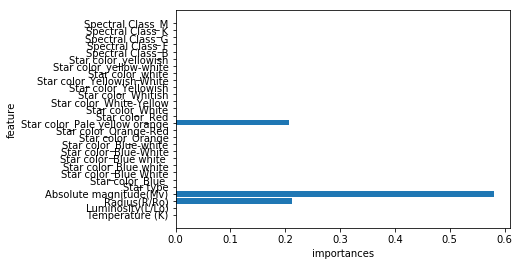

In [13]:
best_tree = DecisionTreeClassifier(max_depth = grid.best_params_['max_depth'], 
                                   max_features = grid.best_params_['max_features'])

# Дерево с лучшими парметрами
best_tree.fit(X_train, y_train)

print("Точность на тесте:", accuracy_score(y_test, grid.predict(X_test)))

# Признаки, отсортированные по убыванию  важности
importances = pd.DataFrame(best_tree.feature_importances_, index = x.columns, columns=['importance']).sort_values('importance',ascending=False)

plt.barh(range(28), best_tree.feature_importances_)
plt.yticks(range(28), data.columns)
plt.xlabel("importances")
plt.ylabel("feature")

print("Наиболее важные признаки:")
print(importances[:3])

## 3
### Продемонстрировать работу случайного леса RandomForestClassifier

In [14]:
randomForest = RandomForestClassifier(max_depth=5)
randomForest.fit(X_train, y_train)
print('Точность на тесте:', accuracy_score(y_test, randomForest.predict(X_test)))

Точность на тесте: 1.0


### С помощью GridSearchCV произвести подбор гиперпараметров для поиск наилучшего леса, посмотреть насколько улучшились метрики

In [15]:
params = {
    'n_estimators': range(10, 100, 10),
    'max_depth': range(1, 20),
    'max_features': range(1, 7)
}

grid = GridSearchCV(randomForest, params, cv = 3)
grid.fit(X_train, y_train)

print("Наилучшие параметры:", grid.best_params_)
print("Точность обучения:", grid.best_score_)
print("Точность на тесте:", accuracy_score(y_test, grid.predict(X_test)))

Наилучшие параметры: {'max_depth': 4, 'max_features': 4, 'n_estimators': 90}
Точность обучения: 1.0
Точность на тесте: 0.9861111111111112


#### Для данного набора данных подойдет классификатор DecisionTreeClassifier и RandomForestClassifier. Судя по полученным данным удается достичь 100% точности.
#### Наилучшие параметры для RandomForestClassifier: {'max_depth': 4, 'max_features': 4, 'n_estimators': 90}, но точность на тесте оказалась выше у стандартной реализации (с парметром max_depth=5)
#### Наилучшие параметры для DecisionTreeClassifie: {'max_depth': 5, 'max_features': 27}

##### (результат ухудшается при сильном увеличении тестовой выборки)